In [9]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

import numpy as np
import networkx as nx

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

import matplotlib.pyplot as plt

In [11]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

# PC algorithm variants with `gCastle`

**PC algorithm** is a popular contraint-based causal discovery algorithm. A little-known fact is that the algorithm has multiple variants that improve upon the original concept. `gCastle` makes it easy to use some of these variants.

`gCastle` (v 1.0.3) supports **PC-stable** (Colombo & Maathuis, 2012) and **PC-parallel** (Le et al., 2015) variants.



____________

**References**
* Colombo, D., & Maathuis, M.H. (2012). Order-independent constraint-based causal structure learning. J. Mach. Learn. Res., 15, 3741-3782.
* Le, T.D., Hoang, T., Li, J., Liu, L., Liu, H., & Hu, S. (2015). A Fast PC Algorithm for High Dimensional Causal Discovery with Multi-Core PCs. IEEE/ACM Transactions on Computational Biology and Bioinformatics, 16, 1483-1495.


________

Keywords: Casusal Discovery, Python, causalpython.io

_________

**Check [Causal Python](https://causalpython.io)** to learn more about my upcoming book, where we discuss causal discovery in greater detail.

In [4]:
# Set random seed
SEED = 18
np.random.seed(SEED)

## Data

In [5]:
# Build a DAG adj matrix
pc_dag = np.array([
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])

In [6]:
# Generate data from this DAG
N = 1000

p = np.random.randn(N)
q = np.random.randn(N)

r = p + q + .1 * np.random.randn(N)
s = .7 * r + .1 * np.random.randn(N)

# To matrix
pc_dataset = np.vstack([p, q, r, s]).T

## Visualize

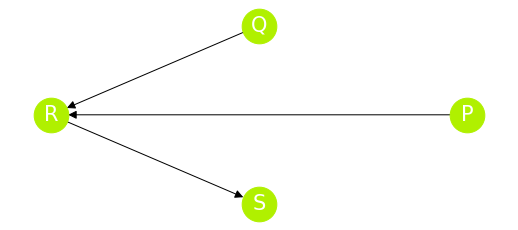

In [13]:
# Plot the original graph

# Get learned graph
true_graph = nx.DiGraph(pc_dag)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(4), ['P', 'Q', 'R', 'S'])}
true_graph = nx.relabel_nodes(true_graph, MAPPING, copy=True)

plt.figure(figsize=(7, 3))
nx.draw(
    G=true_graph,
    node_color=COLORS[2],
    node_size=1200,
    arrowsize=17,
    with_labels=True,
    font_color='white',
    font_size=21,
    pos=nx.circular_layout(true_graph)
)

## Learn

### Original PC

In [14]:
# Initialize PC
pc = PC()

# Fit 
pc.learn(pc_dataset)

# Display the learned matrix
pc.causal_matrix

Tensor([[0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]])

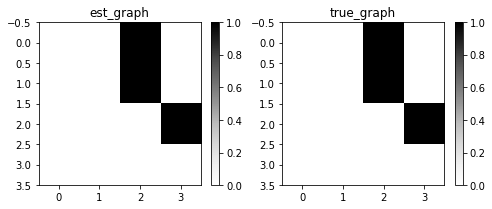

In [15]:
# Visualize results
GraphDAG(
    est_dag=pc.causal_matrix, 
    true_dag=pc_dag)

plt.show()

### PC-stable

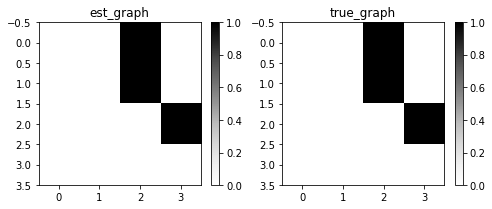

In [16]:
# PC-stable
pc_stable = PC(variant='stable')

# Fit 
pc_stable.learn(pc_dataset)

# Visualize
GraphDAG(
    est_dag=pc_stable.causal_matrix, 
    true_dag=pc_dag)

plt.show()

### PC-parallel

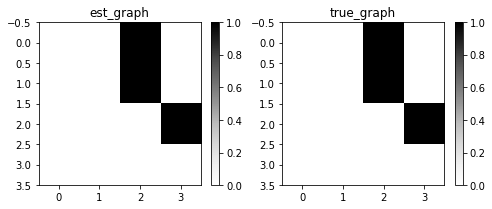

In [17]:
# PC-stable
pc_parallel = PC(variant='parallel')

# Fit 
pc_parallel.learn(pc_dataset)

# Visualize
GraphDAG(
    est_dag=pc_parallel.causal_matrix, 
    true_dag=pc_dag)

plt.show()